Lab2 Grunduppgift

Alla imports

In [28]:
%pip install matplotlib

import matplotlib.pyplot as plt
import numpy as np
import random
from collections import Counter

Note: you may need to restart the kernel to use updated packages.


Funktion för att importera data från fil


In [29]:
def ImportData(path):
    Data = []
    with open(path, "r") as file:
        for line in file:
            DataParts = line.strip().split(",")
            if len(DataParts) == 3:
                WidthData = float(DataParts[0])
                HeightData = float(DataParts[1])
                Label = int(DataParts[2])
                Data.append((WidthData, HeightData, Label))
            if len(DataParts) == 2:
                WidthData = float(DataParts[0])
                HeightData = float(DataParts[1])
                Data.append((WidthData, HeightData))
    return Data

Funktion för att separera datapunkter från fil som Pichu (0) eller Pikachu (1)

In [30]:
def PichuOrPikachuLabel(datapoints):
    WidthsPichu = []
    HeightsPichu = []
    WidthsPikachu = []
    HeightsPikachu = []

    for width, height, label in datapoints:
        if label == 0:
            WidthsPichu.append(width)
            HeightsPichu.append(height)
        elif label == 1:
            WidthsPikachu.append(width)
            HeightsPikachu.append(height)
    
    return WidthsPichu, HeightsPichu, WidthsPikachu, HeightsPikachu

Euklidisk distans funktion

In [31]:
def EuclideanDistance (p1, p2):
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1] - p2[1])**2)

Nearest Neighbor funktion
för 1 närmaste granne

In [32]:
def NearestNeighbor(testpoint, datapoints):
    MinDistance = float("inf")
    PredictedLabel = None

    for data in datapoints:
        DataPoint = (data[0], data[1])
        label = data[2]
        distance = EuclideanDistance(testpoint, DataPoint)
        if distance < MinDistance:
            MinDistance = distance
            PredictedLabel = label

    return PredictedLabel

Nearest Neighbor funktion
för 10 närmaste grannar
NNK funktion
för en testpunkt

In [33]:
def NearestNeighborKOnePoint(testpunkt, datapoints, k=10):
    distances = []

    for data in datapoints:
        DataPoint = (data[0], data[1])
        label = data[2]
        distance = EuclideanDistance(testpunkt, DataPoint)
        distances.append((distance, label))

    distances.sort(key = lambda x: x[0])

    k_neighbors = distances[:k]

    k_labels = [label for _, label in k_neighbors]

    most_common = Counter(k_labels).most_common(1) 

    return most_common[0][0]

Nearest Neighbor funktion
för 10 närmaste grannar
NNK funktion
för flera testpunkter

In [34]:
def NearestNeighborKListOfPoints(TestData, ReferenceData, k=10):
    TrueLabelForTest = []
    PredictedLabelForTest = []

    for test in TestData:
        distances = []
        TestPoint = (test[0], test[1])
        TestLabel = test[2]
        TrueLabelForTest.append(TestLabel)

        for data in ReferenceData:
            DataPoint = (data[0], data[1])
            label = data[2]
            distance = EuclideanDistance(TestPoint, DataPoint)
            distances.append((distance, label))

        distances.sort(key = lambda x: x[0])

        k_neighbors = distances[:k]

        k_labels = [label for _, label in k_neighbors]

        most_common = Counter(k_labels).most_common(1) 

        predicted_label = most_common[0][0]

        PredictedLabelForTest.append(predicted_label)
        
    return TrueLabelForTest, PredictedLabelForTest


Funktion för att klassificera testpunkter från predictedlabel

In [35]:

def Classification(testpoints, datapoints):
    ClassifiedTestpoints = []
    for testpoint in testpoints:
        PredictedLabel = NearestNeighbor(testpoint, datapoints)
        ClassifiedTestpoints.append((testpoint[0], testpoint[1], PredictedLabel))
    return ClassifiedTestpoints

Funktion för att plotta graf över datapunkter och testpunkter

In [36]:
def DatapointsGraph (WidthsPichu, HeightsPichu, WidthsPikachu, HeightsPikachu, ClassifiedTestpoints):
    plt.figure(figsize=(10, 6))
    plt.scatter(WidthsPichu, HeightsPichu, color = "yellow", label = "Pichu")
    plt.scatter(WidthsPikachu, HeightsPikachu, color = "orange", label = "Pikachu")

    LabelDuplet = set()

    for x, y, label in ClassifiedTestpoints:
        color = "green" if label == 0 else "red"
        LabelText = "Classified as Pichu" if label == 0 else "Classified as Pikachu"
        
        if LabelText not in LabelDuplet: # Källhantering: hantering av dubblering av labels förklarat med annat exempel av chatGPT 
            plt.scatter(x, y, color = color, label = LabelText)
            LabelDuplet.add(LabelText)
        else:
            plt.scatter(x, y, color = color)


    plt.title('Pichu or Pikachu')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.xlim(15, 30)
    plt.ylim(25, 45)
    plt.grid(True)
    plt.legend()
    plt.show()

Funktion för testpunkt från input med felhantering

In [37]:
def InputATestpoint():  
    while True:
        try:
            print("Input width and height: ")
            testpoint_x, testpoint_y = float(input()), float(input())
            if testpoint_x < 0:
                raise ValueError("Width must be a positive number")
            if testpoint_y < 0:
                raise ValueError("Height must be a positive number")
            break
        except ValueError as err:
            print("Invalid input:", err)

    InputTestPoint = (testpoint_x, testpoint_y)
    return InputTestPoint

Funktion för att dela upp och blanda datapunkter utifrån värde på d[2]

In [38]:
def SplitAndShuffleDataFile(datapoints):
    Datapoints_c0 = [d for d in datapoints if d[2] == 0]
    Datapoints_c1 = [d for d in datapoints if d[2] == 1]

    random.shuffle(Datapoints_c0) 
    random.shuffle(Datapoints_c1)

    ReferenceData = Datapoints_c0[:50] + Datapoints_c1[:50]
    TestData = Datapoints_c0[50:] + Datapoints_c1[50:]

    random.shuffle(TestData)

    return TestData, ReferenceData

Funktion för att beräkna Accuracy

In [39]:
def AccuracyOfNNK(TrueLabelForTest, PredictedLabelForTest):
    TruePrediction = 0
    FalsePrediction = 0

    for i in range (len(TrueLabelForTest)):
        if TrueLabelForTest[i] == PredictedLabelForTest[i]:
            TruePrediction += 1
        else:
            FalsePrediction += 1

    Accuracy = (TruePrediction)/(TruePrediction + FalsePrediction)
    return Accuracy
    

Funktion för att beräkna Accuray Average

In [40]:
def AccuracyMean(AccuracyList):
    AccuracySum = 0
    for i in AccuracyList:
        AccuracySum += i

    AccuracyAverage = AccuracySum/ len(AccuracyList)

    return AccuracyAverage

Funktion för att plotta Accuracy

In [41]:
def AccuracyGraph(AccuracyList, AccuracyAverage):
    x = list(range(10))
    y = AccuracyList

    plt.figure(figsize = (10, 6))
    plt.plot(x, y)
    plt.axhline(y = AccuracyAverage, color = "red", label = f"Average Accuracy: {AccuracyAverage:.3f}")
    plt.title("Accuracy of Nearest Neighbor prediction")
    plt.xlabel("Simulation nr")
    plt.ylabel("Accuracy")
    plt.xlim(0, 9)
    plt.ylim(0.85 , 1.0)
    plt.grid(True)
    plt.legend()
    plt.show()

Grunduppgift


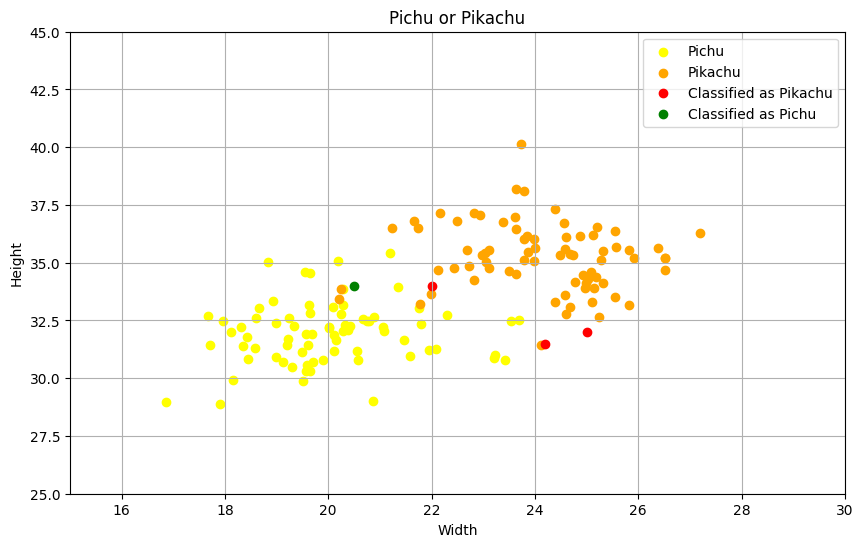

In [42]:
pathData = r"C:\Users\vilma\python-programming-VILMA-LINDROTH\Labs\Lab2\datapoints.txt"
pathTestData = r"C:\Users\vilma\python-programming-VILMA-LINDROTH\Labs\Lab2\testpoints.txt"

datapoints = ImportData(pathData)
testpoints = ImportData(pathTestData)

WidthsPichu, HeightsPichu, WidthsPikachu, HeightsPikachu = PichuOrPikachuLabel(datapoints)

ClassifiedTestpoints = Classification(testpoints, datapoints)

DatapointsGraph (WidthsPichu, HeightsPichu, WidthsPikachu, HeightsPikachu, ClassifiedTestpoints)



Uppgift 1

In [43]:
InputTestPoint = InputATestpoint()

PredictedLabel = NearestNeighbor(InputTestPoint, datapoints)
if PredictedLabel == 0:
    PrintLabel = "Pichu"
else:
    PrintLabel = "Pikachu"
print(f"The input test point is predicted to be: {PrintLabel}")

Input width and height: 
The input test point is predicted to be: Pikachu


Uppgift 2

In [44]:
PredictedLabel = NearestNeighborKOnePoint(InputTestPoint, datapoints , k=10)
if PredictedLabel == 0:
    PrintLabel = "Pichu"
else:
    PrintLabel = "Pikachu"
print(f"The input test point is predicted to be: {PrintLabel}")

The input test point is predicted to be: Pikachu


Uppgift 3 och 4

In [45]:
TestData, ReferenceData = SplitAndShuffleDataFile(datapoints)
TrueLabelForTest, PredictedLabelForTest = NearestNeighborKListOfPoints(TestData, ReferenceData, k = 10)
Accuracy = AccuracyOfNNK(TrueLabelForTest, PredictedLabelForTest)
print(f"Accuracy: {Accuracy}")


Accuracy: 0.94


Uppgift 5

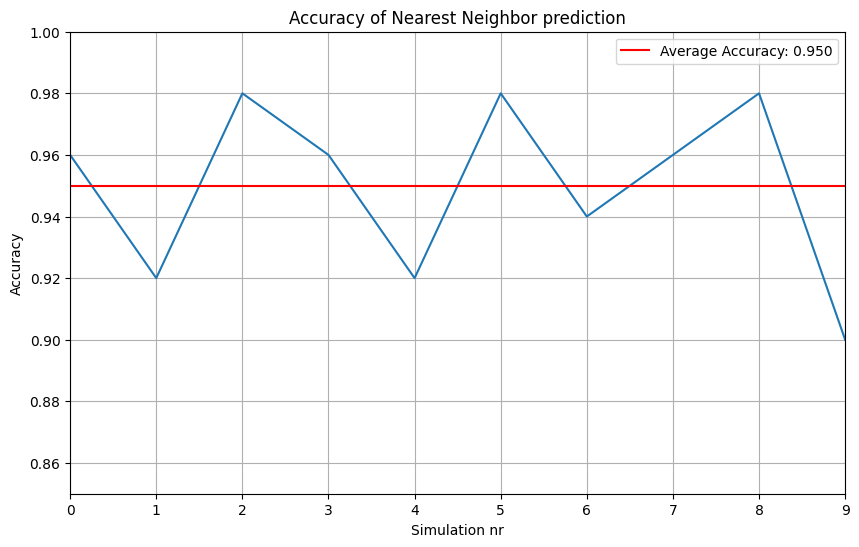

In [48]:
AccuracyList = []
for simulations in range(10):
    TestData, ReferenceData = SplitAndShuffleDataFile(datapoints)
    TrueLabelForTest, PredictedLabelForTest = NearestNeighborKListOfPoints(TestData, ReferenceData, k = 10)
    Accuracy = AccuracyOfNNK(TrueLabelForTest, PredictedLabelForTest)
    AccuracyList.append(Accuracy)

AccuracyAverage = AccuracyMean(AccuracyList)

AccuracyGraph(AccuracyList, AccuracyAverage)